In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
from google.colab import files

In [ ]:
#load libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [ ]:
uploaded = files.upload()

Saving train-chennai-sale.csv to train-chennai-sale.csv


In [ ]:
#read the CSV file
houseDetails = pd.read_csv("train-chennai-sale.csv")

In [ ]:
#check the head values of csv file
houseDetails.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,4/5/2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,4/2/2012,70,1.0,1.0,3,AbNormal,Yes,9/2/1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,5/10/2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
#check how many rows and how many colums
houseDetails.shape

(7109, 22)

In [ ]:
#to check the data types that are present in the given data set
houseDetails.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
#verifying the null values
houseDetails.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
#converting the date_sale colume to date time from object type
#houseDetails['DATE_SALE'] = pd.to_datetime(houseDetails['DATE_SALE'])

In [ ]:
#houseDetails.dtypes

In [ ]:
#fill the null values with the mean va;ues of the column
houseDetails = houseDetails.fillna({"N_BEDROOM": houseDetails["N_BEDROOM"].mean(), "INT_SQFT": houseDetails["INT_SQFT"].mean(),
                     "N_BATHROOM": houseDetails["N_BATHROOM"].mean(), "QS_OVERALL": houseDetails["QS_OVERALL"].mean()})

In [ ]:
#verifying the null values after filling the null values
houseDetails.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
# converting the dtype of N_BEDROOM, N_BATHROOM, QS_BATHROOM, QS_BEDROOM and QS_ROOM
# columns to int64 type from float 64 type
houseDetails['N_BEDROOM'] = houseDetails['N_BEDROOM'].astype(int)
houseDetails['N_BATHROOM'] = houseDetails['N_BATHROOM'].astype(int)
houseDetails['QS_BATHROOM'] = houseDetails['QS_BATHROOM'].astype(int)
houseDetails['QS_BEDROOM'] = houseDetails['QS_BEDROOM'].astype(int)
houseDetails['QS_ROOMS'] = houseDetails['QS_ROOMS'].astype(int)

In [ ]:
houseDetails['QS_OVERALL'] = houseDetails['QS_OVERALL'].astype(int)

PARK_FACIL

In [ ]:
#converting yes or no type to 1 or 0 in PARK_FACIL colum
houseDetails.replace("Noo","No", inplace=True)
houseDetails['PARK_FACIL'] = houseDetails['PARK_FACIL'].map({'Yes': 1, 'No': 0})

In [ ]:
houseDetails.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
houseDetails['PARK_FACIL'] = houseDetails['PARK_FACIL'].astype(int)

In [ ]:
#verifying the dtypes of all the collumns after convertion
houseDetails.dtypes

PRT_ID           object
AREA             object
INT_SQFT          int64
DIST_MAINROAD     int64
N_BEDROOM         int64
N_BATHROOM        int64
N_ROOM            int64
SALE_COND        object
PARK_FACIL        int64
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
QS_ROOMS          int64
QS_BATHROOM       int64
QS_BEDROOM        int64
QS_OVERALL        int64
REG_FEE           int64
COMMIS            int64
SALES_PRICE       int64
SOLD_YEAR         int64
BUILT_YEAR        int64
dtype: object

In [ ]:
houseDetails.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,4/5/2011,131,1,1,3,AbNormal,1,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,0,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,4/2/2012,70,1,1,3,AbNormal,1,9/2/1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,0,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,5/10/2009,84,1,1,3,AbNormal,1,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
#Describe the houseDetails dataset
houseDetails.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,0.504572,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.500014,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,0.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,1.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,1.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,1.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


AREA

In [ ]:
#Do the spelling correction
houseDetails.replace("Karapakam","Karapakkam", inplace=True)
houseDetails.replace("Ana Nagar","Anna Nagar", inplace=True)
houseDetails.replace("Ann Nagar","Anna Nagar", inplace=True)
houseDetails.replace("KKNagar","KK Nagar", inplace=True)
houseDetails.replace("Adyr","Adyar", inplace=True)
houseDetails.replace("Chormpet","Chrompet", inplace=True)
houseDetails.replace("Chormpt","Chrompet", inplace=True)
houseDetails.replace("Chrmpet","Chrompet", inplace=True)
houseDetails.replace("TNagar","T Nagar", inplace=True)
houseDetails.replace("Velchery","Velachery", inplace=True)
houseDetails.replace("Velacheryr","Velachery", inplace=True)

In [ ]:
#identify the unique values in area column
houseDetails.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar', 'Chrompt'], dtype=object)

In [ ]:
houseDetails.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

STREET

In [ ]:
#identify the unique columns of street column
houseDetails.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
#correct the spellings in street columns
houseDetails.replace("Pavd","Paved",inplace=True)
houseDetails.replace("NoAccess", "No Access", inplace=True)

In [ ]:
#identify the unique columns of street column
houseDetails.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
houseDetails.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

DIST_MAINROAD 

In [ ]:
houseDetails.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

N_BEDROOM

In [ ]:
houseDetails.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

Built date and Sale Date

In [ ]:
houseDetails.DATE_BUILD = pd.to_datetime(houseDetails.DATE_BUILD, format='%Y-%m-%d',errors='ignore')
houseDetails.DATE_SALE = pd.to_datetime(houseDetails.DATE_SALE, format='%Y-%m-%d',errors='ignore')
houseDetails['SOLD_YEAR']=pd.DatetimeIndex(houseDetails['DATE_SALE']).year
houseDetails['BUILT_YEAR']=pd.DatetimeIndex(houseDetails['DATE_BUILD']).year
houseDetails.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SOLD_YEAR,BUILT_YEAR
0,P03210,Karapakkam,1004,4/5/2011,131,1,1,3,AbNormal,1,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,0,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995
2,P01812,Adyar,909,4/2/2012,70,1,1,3,AbNormal,1,9/2/1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,0,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988
4,P06210,Karapakkam,1226,5/10/2009,84,1,1,3,AbNormal,1,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979


In [ ]:
houseDetails = houseDetails.drop(["DATE_SALE","DATE_BUILD"], axis=1)

In [ ]:
houseDetails["BUILDING_AGE"] = houseDetails["SOLD_YEAR"] - houseDetails['BUILT_YEAR']

In [ ]:
houseDetails.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SOLD_YEAR,BUILT_YEAR,BUILDING_AGE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,4,3,4,4,380000,144400,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,4,4,2,3,760122,304049,21717770,2006,1995,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,4,3,2,3,421094,92114,13159200,2012,1992,20
3,P05346,Velachery,1855,14,3,2,5,Family,0,Others,NoSewr,Paved,I,4,3,3,4,356321,77042,9630290,2010,1988,22
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,1,Others,AllPub,Gravel,C,3,2,4,3,237000,74063,7406250,2009,1979,30


INT_SQFT

In [ ]:
houseDetails.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

SALE_COND

In [ ]:
houseDetails.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
houseDetails.replace("AbNormal","Ab Normal", inplace=True)
houseDetails.replace("Partiall","Partial", inplace=True)
houseDetails.replace("AdjLand","Adj Land", inplace=True)
houseDetails.replace("PartiaLl","Partial", inplace=True)
houseDetails.SALE_COND.unique()

array(['Ab Normal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
houseDetails.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

In [ ]:
houseDetails.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
SOLD_YEAR        0
BUILT_YEAR       0
BUILDING_AGE     0
dtype: int64

BUILDTYPE

In [ ]:
houseDetails.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
houseDetails.replace("Commercial","Comercial", inplace=True)
houseDetails.replace("Other","Others", inplace=True)
houseDetails.BUILDTYPE.unique()

array(['Comercial', 'Others', 'House'], dtype=object)

In [ ]:
houseDetails.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
SOLD_YEAR        0
BUILT_YEAR       0
BUILDING_AGE     0
dtype: int64

In [ ]:
houseDetails.BUILDTYPE.value_counts()

House        2444
Others       2336
Comercial    2329
Name: BUILDTYPE, dtype: int64

UTILIT_AVAIL

In [ ]:
houseDetails.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
houseDetails.replace("AllPub","All Pub", inplace=True)
houseDetails.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [ ]:
houseDetails.UTILITY_AVAIL.value_counts()

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

MZZONE

In [ ]:
houseDetails.MZZONE.unique()
houseDetails.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [ ]:
#sorting based on house sold year
houseDetails = houseDetails.sort_values('SOLD_YEAR')
houseDetails.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SOLD_YEAR,BUILT_YEAR,BUILDING_AGE
3378,P09941,Velachery,1828,142,3,2,5,Family,1,Others,ELO,No Access,A,4,2,4,3,298084,93684,8516690,2004,1982,22
1664,P09952,Velachery,1568,110,2,1,4,Adj Land,1,Others,NoSewr,Gravel,RM,2,4,3,3,471795,161404,12415670,2004,1993,11
2564,P09945,Velachery,1601,188,2,1,4,Normal Sale,1,Others,ELO,Paved,A,4,3,4,3,246695,148017,8223180,2004,1970,34
1627,P09923,Velachery,1603,138,2,1,4,Ab Normal,1,Comercial,NoSeWa,Gravel,I,3,2,4,3,564106,155129,14102650,2004,1979,25
5284,P10034,Velachery,1968,51,3,2,5,Ab Normal,0,Others,All Pub,No Access,C,3,4,4,4,318946,103442,8620150,2004,1959,45


In [ ]:
#houseDetails.dtypes

In [ ]:
houseDetails['SALES_PRICE'] = houseDetails['SALES_PRICE'].astype(int)
houseDetails['SOLD_YEAR'] = houseDetails['SOLD_YEAR'].astype(int)

In [ ]:
#correcting the sales price as per todays value
houseDetails['CORRECTED_SALES_PRICE'] = houseDetails['SALES_PRICE']*((1.05)**(2021 - houseDetails['SOLD_YEAR']))
houseDetails['CORRECTED_SALES_PRICE'] = houseDetails['CORRECTED_SALES_PRICE'].round(2)
houseDetails.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SOLD_YEAR,BUILT_YEAR,BUILDING_AGE,CORRECTED_SALES_PRICE
3378,P09941,Velachery,1828,142,3,2,5,Family,1,Others,ELO,No Access,A,4,2,4,3,298084,93684,8516690,2004,1982,22,19520409.49
1664,P09952,Velachery,1568,110,2,1,4,Adj Land,1,Others,NoSewr,Gravel,RM,2,4,3,3,471795,161404,12415670,2004,1993,11,28456943.07
2564,P09945,Velachery,1601,188,2,1,4,Normal Sale,1,Others,ELO,Paved,A,4,3,4,3,246695,148017,8223180,2004,1970,34,18847679.19
1627,P09923,Velachery,1603,138,2,1,4,Ab Normal,1,Comercial,NoSeWa,Gravel,I,3,2,4,3,564106,155129,14102650,2004,1979,25,32323532.13
5284,P10034,Velachery,1968,51,3,2,5,Ab Normal,0,Others,All Pub,No Access,C,3,4,4,4,318946,103442,8620150,2004,1959,45,19757541.70


In [ ]:
#drop columns property id, registration fee, commision fee, and old sales price
houseDetails=houseDetails.drop(columns=['PRT_ID','REG_FEE','COMMIS','SALES_PRICE'])
houseDetails.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SOLD_YEAR,BUILT_YEAR,BUILDING_AGE,CORRECTED_SALES_PRICE
3378,Velachery,1828,142,3,2,5,Family,1,Others,ELO,No Access,A,4,2,4,3,2004,1982,22,19520409.49
1664,Velachery,1568,110,2,1,4,Adj Land,1,Others,NoSewr,Gravel,RM,2,4,3,3,2004,1993,11,28456943.07
2564,Velachery,1601,188,2,1,4,Normal Sale,1,Others,ELO,Paved,A,4,3,4,3,2004,1970,34,18847679.19
1627,Velachery,1603,138,2,1,4,Ab Normal,1,Comercial,NoSeWa,Gravel,I,3,2,4,3,2004,1979,25,32323532.13
5284,Velachery,1968,51,3,2,5,Ab Normal,0,Others,All Pub,No Access,C,3,4,4,4,2004,1959,45,19757541.70


In [ ]:
# Correlation metrix using pandas
corr = houseDetails.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SOLD_YEAR,BUILT_YEAR,BUILDING_AGE,CORRECTED_SALES_PRICE
INT_SQFT,1.00,0.00,0.79,0.52,0.95,0.00,0.02,-0.01,0.01,0.01,-0.12,-0.01,-0.01,0.61
DIST_MAINROAD,0.00,1.00,-0.00,0.00,0.00,-0.01,0.01,-0.02,0.00,-0.01,0.01,0.01,-0.00,0.02
N_BEDROOM,0.79,-0.00,1.00,0.76,0.84,-0.01,0.01,-0.01,0.01,0.01,-0.19,0.01,-0.05,0.37
N_BATHROOM,0.52,0.00,0.76,1.00,0.57,-0.01,0.01,-0.01,0.01,0.00,-0.11,0.00,-0.02,0.14
N_ROOM,0.95,0.00,0.84,0.57,1.00,-0.00,0.01,-0.01,0.01,0.01,-0.11,0.01,-0.03,0.60
PARK_FACIL,0.00,-0.01,-0.01,-0.01,-0.00,1.00,-0.01,-0.01,-0.00,0.00,-0.00,0.01,-0.01,0.14
QS_ROOMS,0.02,0.01,0.01,0.01,0.01,-0.01,1.00,0.00,0.01,0.43,0.01,-0.01,0.02,0.01
QS_BATHROOM,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,0.00,1.00,-0.01,0.45,-0.01,-0.02,0.02,-0.02
QS_BEDROOM,0.01,0.00,0.01,0.01,0.01,-0.00,0.01,-0.01,1.00,0.53,0.00,0.01,-0.01,0.01
QS_OVERALL,0.01,-0.01,0.01,0.00,0.01,0.00,0.43,0.45,0.53,1.00,-0.00,-0.01,0.01,0.01


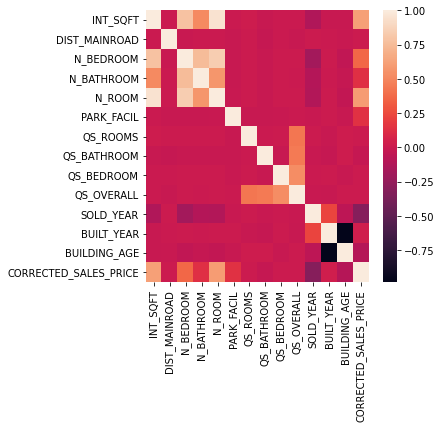

In [ ]:
# Correlation metrix using seaborn
correlation = houseDetails.corr()
x,y = plt.subplots(figsize=(5,5))
sns.heatmap(houseDetails.corr())

In [ ]:
correlation['CORRECTED_SALES_PRICE']

INT_SQFT                 0.612943
DIST_MAINROAD            0.015286
N_BEDROOM                0.371046
N_BATHROOM               0.138669
N_ROOM                   0.600436
PARK_FACIL               0.141531
QS_ROOMS                 0.012307
QS_BATHROOM             -0.018327
QS_BEDROOM               0.012141
QS_OVERALL               0.010671
SOLD_YEAR               -0.313831
BUILT_YEAR               0.037996
BUILDING_AGE            -0.095095
CORRECTED_SALES_PRICE    1.000000
Name: CORRECTED_SALES_PRICE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b29e51d0>,
      dtype=object)

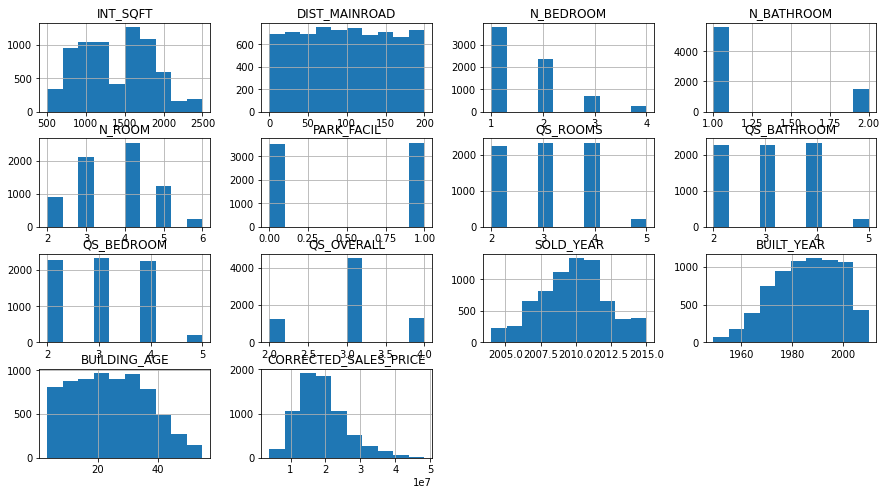

In [ ]:
# Histogram using pandas 
houseDetails.hist(figsize=(15,8))

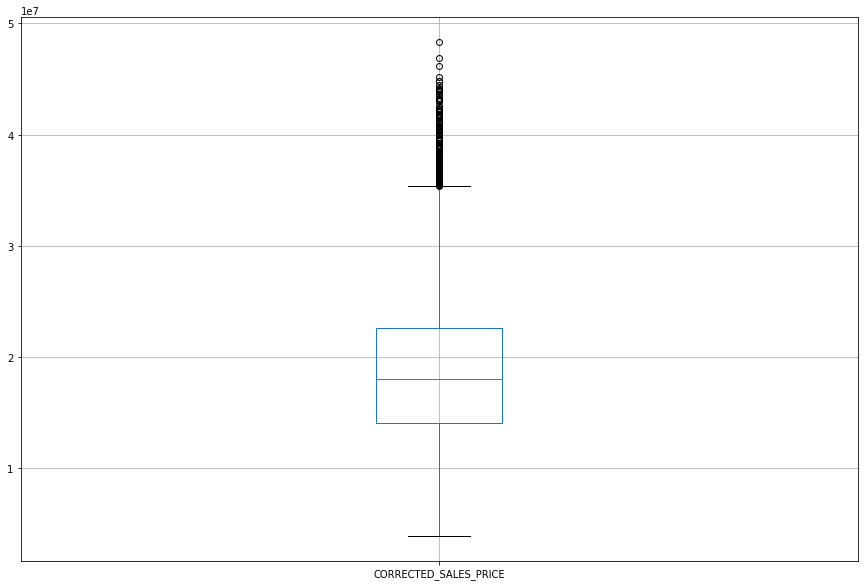

In [ ]:
#boxplot for corrected sales price
houseDetails.boxplot(column="CORRECTED_SALES_PRICE", figsize=(15,10))

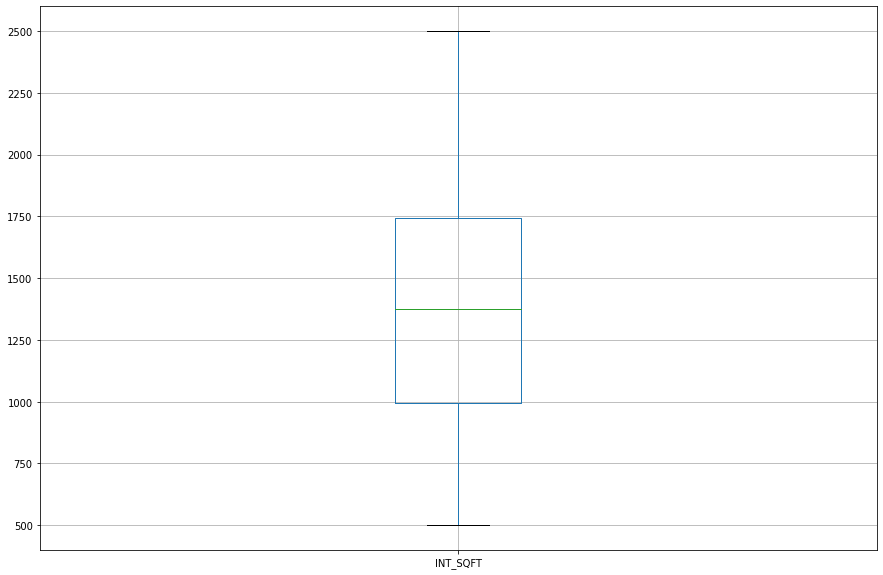

In [ ]:
#boxplot for INT_SQFT
houseDetails.boxplot(column='INT_SQFT',figsize=(15,10))

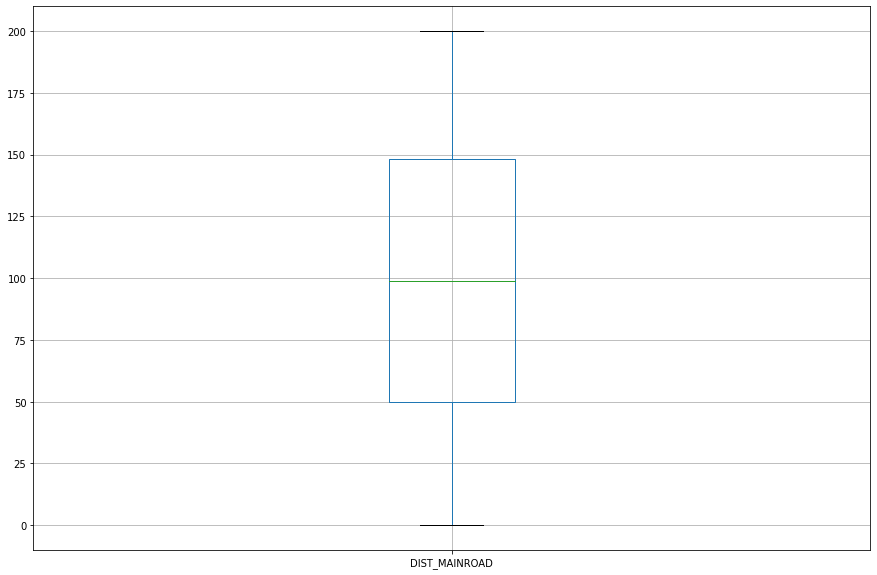

In [ ]:
#boxplot for DIST_MAINROAD
houseDetails.boxplot(column='DIST_MAINROAD',figsize=(15,10))

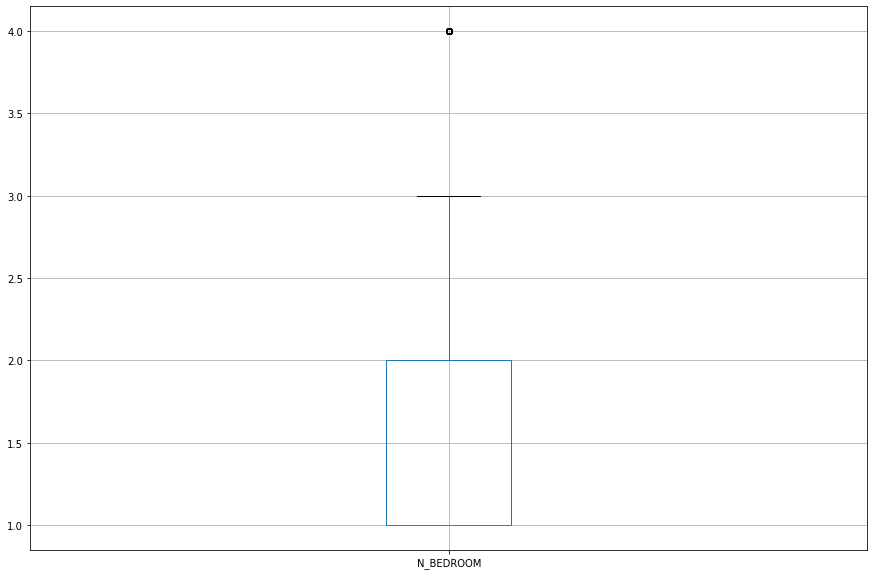

In [ ]:
#boxplot for N_BEDROOM
houseDetails.boxplot(column='N_BEDROOM',figsize=(15,10))

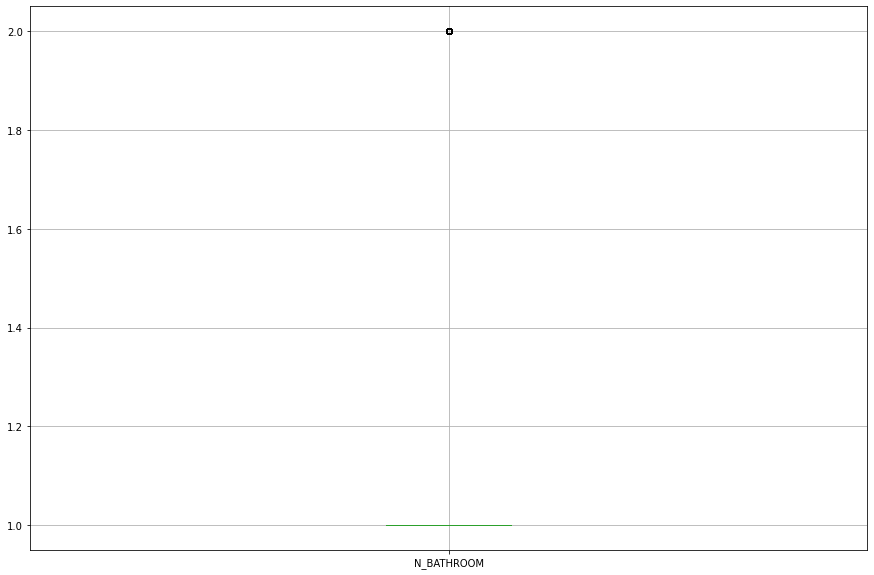

In [ ]:
#boxplot for N_BATHROOM
houseDetails.boxplot(column='N_BATHROOM',figsize=(15,10))

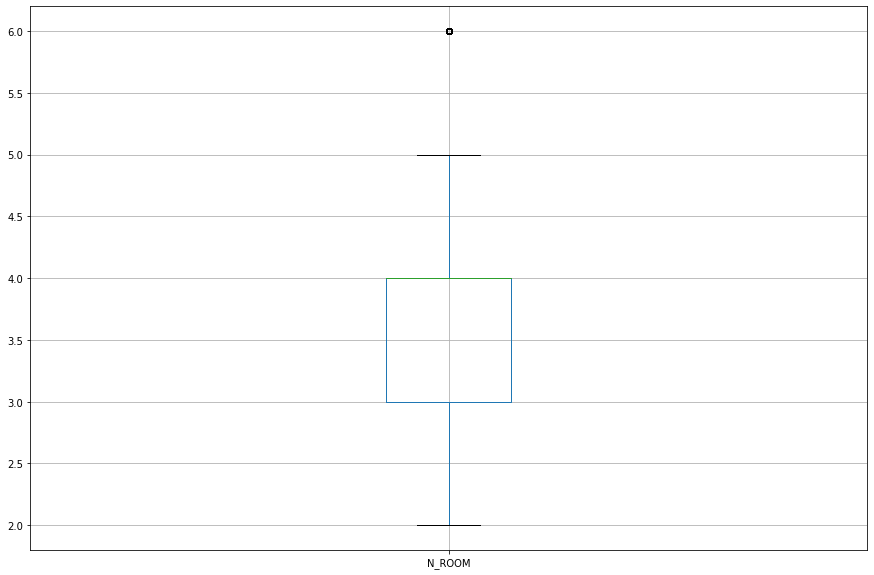

In [ ]:
#boxplot for N_ROOM
houseDetails.boxplot(column='N_ROOM',figsize=(15,10))

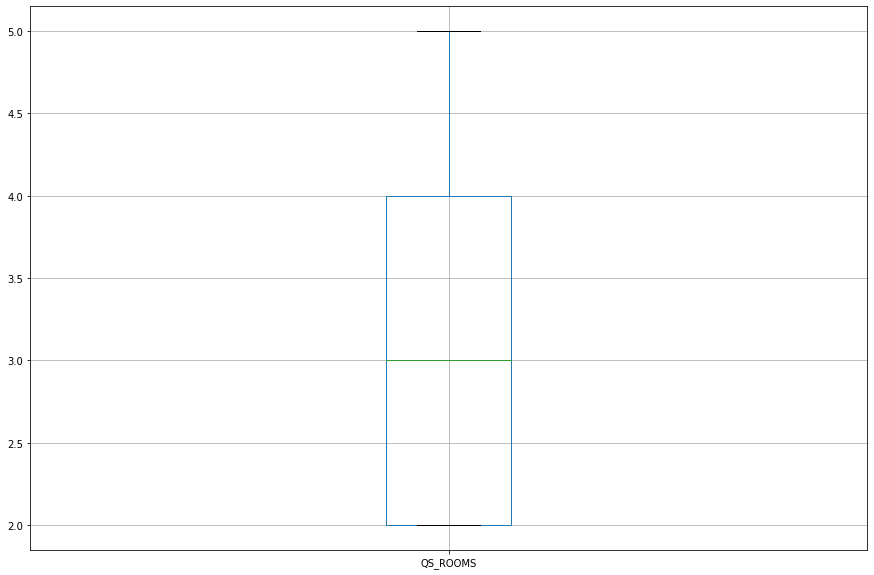

In [ ]:
#boxplot for QS_ROOMS
houseDetails.boxplot(column='QS_ROOMS',figsize=(15,10))

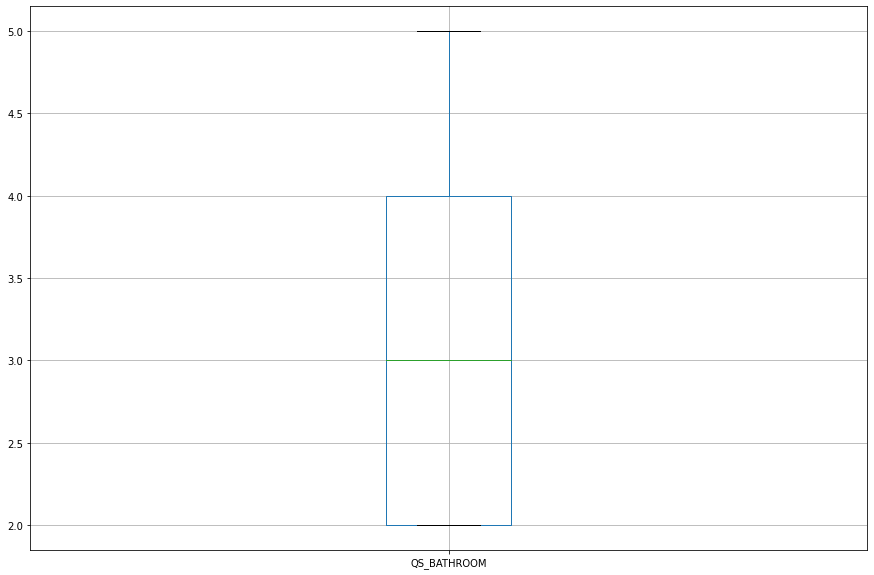

In [ ]:
#boxplot for QS_BATHROOM
houseDetails.boxplot(column='QS_BATHROOM',figsize=(15,10))

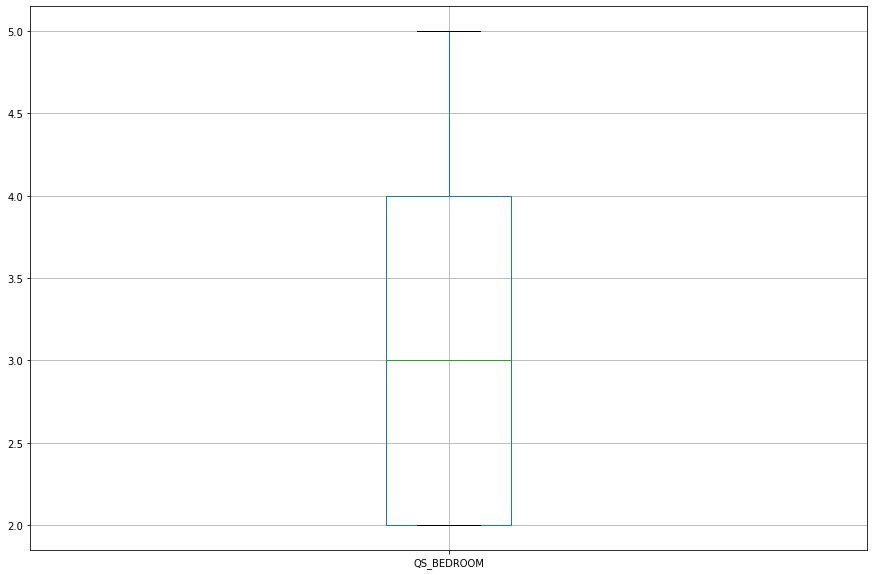

In [ ]:
#boxplot for QS_BEDROOM
houseDetails.boxplot(column='QS_BEDROOM',figsize=(15,10))

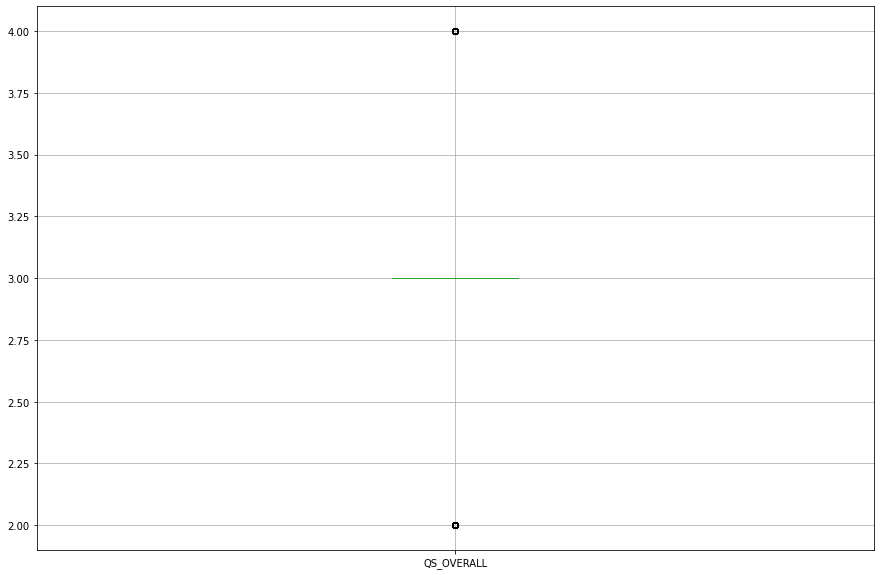

In [ ]:
#boxplot for QS_OVERALL
houseDetails.boxplot(column='QS_OVERALL',figsize=(15,10))

In [ ]:
houseDetails.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SOLD_YEAR,BUILT_YEAR,BUILDING_AGE,CORRECTED_SALES_PRICE
3378,Velachery,1828,142,3,2,5,Family,1,Others,ELO,No Access,A,4,2,4,3,2004,1982,22,19520409.49
1664,Velachery,1568,110,2,1,4,Adj Land,1,Others,NoSewr,Gravel,RM,2,4,3,3,2004,1993,11,28456943.07
2564,Velachery,1601,188,2,1,4,Normal Sale,1,Others,ELO,Paved,A,4,3,4,3,2004,1970,34,18847679.19
1627,Velachery,1603,138,2,1,4,Ab Normal,1,Comercial,NoSeWa,Gravel,I,3,2,4,3,2004,1979,25,32323532.13
5284,Velachery,1968,51,3,2,5,Ab Normal,0,Others,All Pub,No Access,C,3,4,4,4,2004,1959,45,19757541.70


In [ ]:
area = pd.get_dummies(houseDetails['AREA'], drop_first=True)
area.head()

,Anna Nagar,Chrompet,Chrompt,KK Nagar,Karapakkam,T Nagar,Velachery
3378,0,0,0,0,0,0,1
1664,0,0,0,0,0,0,1
2564,0,0,0,0,0,0,1
1627,0,0,0,0,0,0,1
5284,0,0,0,0,0,0,1


In [ ]:
sale_cond = pd.get_dummies(houseDetails['SALE_COND'], drop_first=True)
sale_cond.head()

,Adj Land,Family,Normal Sale,Partial
3378,0,1,0,0
1664,1,0,0,0
2564,0,0,1,0
1627,0,0,0,0
5284,0,0,0,0


In [ ]:
buildtype = pd.get_dummies(houseDetails['BUILDTYPE'], drop_first=True)
buildtype.head()

,House,Others
3378,0,1
1664,0,1
2564,0,1
1627,0,0
5284,0,1


In [ ]:
util_avail = pd.get_dummies(houseDetails['UTILITY_AVAIL'], drop_first=True)
util_avail.head()

,ELO,NoSeWa,NoSewr
3378,1,0,0
1664,0,0,1
2564,1,0,0
1627,0,1,0
5284,0,0,0


In [ ]:
street = pd.get_dummies(houseDetails['STREET'], drop_first=True)
street.head()

,No Access,Paved
3378,1,0
1664,0,0
2564,0,1
1627,0,0
5284,1,0


In [ ]:
mzzone = pd.get_dummies(houseDetails['MZZONE'], drop_first=True)
street.head()

,No Access,Paved
3378,1,0
1664,0,0
2564,0,1
1627,0,0
5284,1,0


In [ ]:
houseDetails = pd.concat([houseDetails, area, sale_cond, buildtype, util_avail, street, mzzone], axis = 1)
houseDetails.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SOLD_YEAR,BUILT_YEAR,BUILDING_AGE,CORRECTED_SALES_PRICE,Anna Nagar,Chrompet,Chrompt,KK Nagar,Karapakkam,T Nagar,Velachery,Adj Land,Family,Normal Sale,Partial,House,Others,ELO,NoSeWa,NoSewr,No Access,Paved,C,I,RH,RL,RM
3378,Velachery,1828,142,3,2,5,Family,1,Others,ELO,No Access,A,4,2,4,3,2004,1982,22,19520409.49,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
1664,Velachery,1568,110,2,1,4,Adj Land,1,Others,NoSewr,Gravel,RM,2,4,3,3,2004,1993,11,28456943.07,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2564,Velachery,1601,188,2,1,4,Normal Sale,1,Others,ELO,Paved,A,4,3,4,3,2004,1970,34,18847679.19,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
1627,Velachery,1603,138,2,1,4,Ab Normal,1,Comercial,NoSeWa,Gravel,I,3,2,4,3,2004,1979,25,32323532.13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5284,Velachery,1968,51,3,2,5,Ab Normal,0,Others,All Pub,No Access,C,3,4,4,4,2004,1959,45,19757541.70,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [ ]:
#drop columns property id, registration fee, commision fee, and old sales price
houseDetails=houseDetails.drop(columns=['AREA','SALE_COND','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE'])
houseDetails.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SOLD_YEAR,BUILT_YEAR,BUILDING_AGE,CORRECTED_SALES_PRICE,Anna Nagar,Chrompet,Chrompt,KK Nagar,Karapakkam,T Nagar,Velachery,Adj Land,Family,Normal Sale,Partial,House,Others,ELO,NoSeWa,NoSewr,No Access,Paved,C,I,RH,RL,RM
3378,1828,142,3,2,5,1,4,2,4,3,2004,1982,22,19520409.49,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
1664,1568,110,2,1,4,1,2,4,3,3,2004,1993,11,28456943.07,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2564,1601,188,2,1,4,1,4,3,4,3,2004,1970,34,18847679.19,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
1627,1603,138,2,1,4,1,3,2,4,3,2004,1979,25,32323532.13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5284,1968,51,3,2,5,0,3,4,4,4,2004,1959,45,19757541.70,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [ ]:
houseDetails["CORRECTED_SALES_PRICE"] = lb_make.fit_transform(houseDetails["CORRECTED_SALES_PRICE"])
houseDetails["CORRECTED_SALES_PRICE"] = lb_make.fit_transform(houseDetails["CORRECTED_SALES_PRICE"])

In [ ]:
x = houseDetails.drop("CORRECTED_SALES_PRICE", axis=1)
y = houseDetails['CORRECTED_SALES_PRICE']

In [ ]:
validation_size = 0.20
seed = 6
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,  test_size = 0.25)

In [ ]:
regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.9539561858532747


In [ ]:
regr.intercept_

571682.7072665327

In [ ]:
regr.coef_

array([ 2.09039934e+00, -4.21219292e-02, -2.08278023e+02, -9.96647704e+00,
        2.51691993e+02,  5.39227839e+02,  1.15665904e+01,  2.58696164e+01,
        1.94080662e+01,  8.08865522e+00, -1.92609600e+02, -9.13923141e+01,
       -1.01217286e+02,  5.24518806e+02, -1.80620338e+02, -1.05748594e+02,
       -8.23800110e+02, -1.31230109e+03,  4.80561274e+02, -6.07376764e+02,
        1.84667103e+02, -1.01751520e+01, -2.28481695e+01, -1.43855330e+02,
       -2.29576483e+03, -1.87340302e+03, -1.91377749e+02, -1.35254300e+02,
       -7.50109513e+01, -6.15038125e+02, -2.88576097e+02,  3.15326122e+02,
        6.60049785e+02,  1.02764975e+03,  1.37647343e+03,  1.70001282e+03])

In [ ]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
print(DTR.score(x_test, y_test))

0.8943365387752698


In [ ]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
print(RFR.score(x_test, y_test))

0.9572988568159874


In [ ]:
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
print(XGB.score(x_test, y_test))

[14:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9693798819889544


In [ ]:
KNNR = KNeighborsRegressor()
KNNR.fit(x_train, y_train)
print(KNNR.score(x_test, y_test))

0.3352478134590233


In [ ]:
predections = XGB.predict(x_test)